<a href="https://colab.research.google.com/github/Ocedy16/Machine-Learning-L2/blob/main/TD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

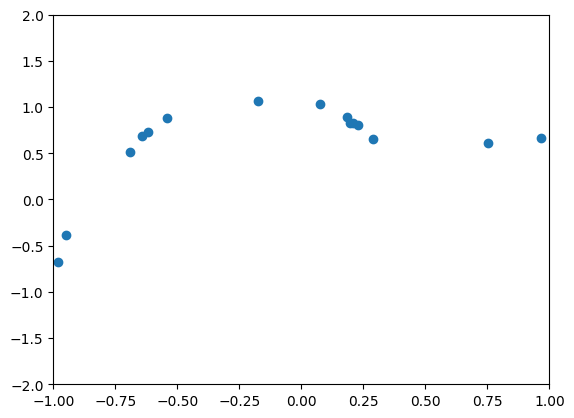

Erreur moyenne d'apprentissage : 0.1591131964577523
Erreur moyenne de test : 0.20009967502495848


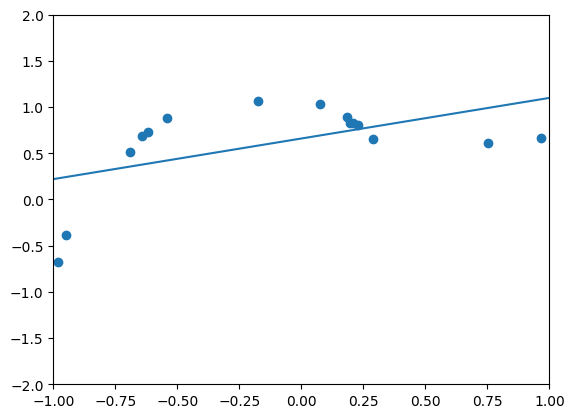

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=2* np.random.random_sample(15) -1
x


def g(x):
    return (3/2)*(x**3) - x**2 - (3/4)*x +1
def y1(x):
    return g(x)+(1/20)*np.random.randn()
y=[]
for i in x:
    y=np.append(y,y1(i))
y


plt.scatter(x,y)
plt.axis([-1,1,-2,2])
plt.show()


x_test=2* np.random.random_sample(30) -1
y_test=[]
for i in x_test:
    y_test=np.append(y_test,y1(i))



from sklearn.linear_model import LinearRegression
f= LinearRegression()
X=x[:,np.newaxis]
X_test=x_test[:,np.newaxis]
f.fit(X,y)
#ord=f.coef_*x+f.intercept_
xplot=np.linspace(-1,1,500).reshape(-1,1)
plt.scatter(x,y)
plt.axis([-1,1,-2,2])
#plt.plot(x,ord)
#Ce que j'ai mis est bon mais peut être optimisé
plt.plot(xplot,f.predict(xplot))


print("Erreur moyenne d'apprentissage :", sum((y-f.predict(X))**2)/15)
print("Erreur moyenne de test :", sum((y_test-f.predict(X_test))**2)/30)


from sklearn.preprocessing import PolynomialFeatures
psi= PolynomialFeatures(2,include_bias=False).fit_transform
f=LinearRegression().fit(psi(X),y)
f.fit(X,y)



Erreur moyenne d'apprentissage : 0.06046933766828032
Erreur moyenne de test : 0.05780568152634201


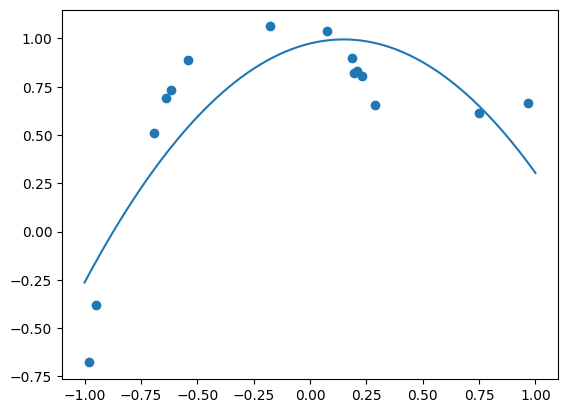

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
psi= PolynomialFeatures(2,include_bias=False).fit_transform
f=LinearRegression().fit(psi(X),y)
plt.scatter(x,y)
plt.plot(xplot, f.predict(psi(xplot)))
plt.show

print("Erreur moyenne d'apprentissage :", sum((y-f.predict(psi(X)))**2)/15)
print("Erreur moyenne de test :", sum((y_test-f.predict(psi(X_test)))**2)/30)

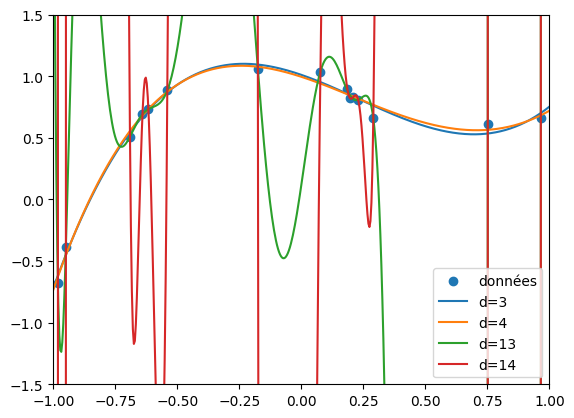

1.0115749390508437
[-0.69441694 -0.99385501  1.42989976]


<function matplotlib.pyplot.show(close=None, block=None)>

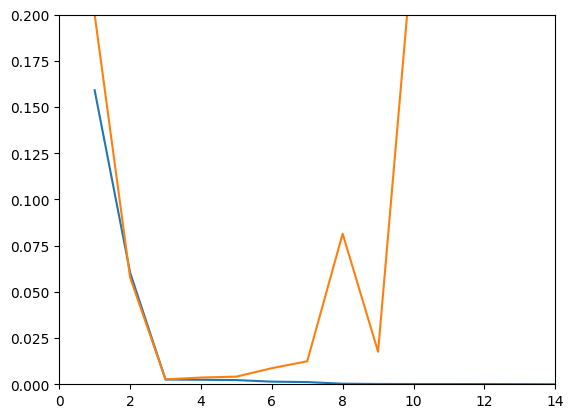

In [ ]:
def regr_poly (d):
  psi= PolynomialFeatures(d,include_bias=False).fit_transform
  return LinearRegression().fit(psi(X),y), psi
plt.scatter(X,y)
poly={}
psi={}
for d in [3,4,13,14]:
  poly[d], psi[d]= regr_poly(d)
  plt.plot(xplot,poly[d].predict(psi[d](xplot)))
plt.axis([-1,1,-1.5,1.5])
plt.legend(["données",'d=3','d=4', 'd=13','d=14'])
plt.show()

print(poly[3].intercept_)
print(poly[3].coef_)

mean_train_error=[]
mean_test_error=[]
d_max=14
for d in range (1,d_max +1):
  f,psi=regr_poly(d)
  mean_train_error.append(sum((y-f.predict(psi(X)))**2)/15)
  mean_test_error.append(sum((y_test-f.predict(psi(X_test)))**2)/30)
plt.plot(range(1,d_max+1),mean_train_error)
plt.plot(range(1,d_max+1),mean_test_error)
plt.axis([0,d_max,0,.2])
plt.show

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.244e-03, tolerance: 3.357e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.306e-03, tolerance: 3.357e-04
  model = cd_fast.enet_coordinate_descent(


Coefficients du polynôme: [-0.80977651 -1.7439436   1.43818291  1.43124531  0.68503556  0.20323631
 -0.31867643 -0.10422832 -0.29085487 -0.26237837 -0.09574834 -0.35867081
  0.05059117 -0.43137953]
Coefficients du polynôme: [-0.80346743 -1.6976538   1.44710868  1.33723902  0.59682314  0.16475582
 -0.23534634  0.01547455 -0.26382397 -0.23489089 -0.08503855 -0.37832633
 -0.         -0.47125234]
Coefficients du polynôme: [-0.74444287 -1.30889202  1.57135362  0.72561263  0.          0.
 -0.          0.         -0.13660436 -0.         -0.         -0.
 -0.         -0.59519143]
Coefficients du polynôme: [-0.54682298 -0.84055592  1.11124956 -0.          0.14624429 -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.20556784]
Coefficients du polynôme: [-0.         -0.16416038  0.         -0.70843274  0.06622182 -0.
  0.62455106 -0.          0.         -0.          0.         -0.
  0.         -0.        ]
Coefficients du polynôme: [ 0.00990934 -0.          0.1565

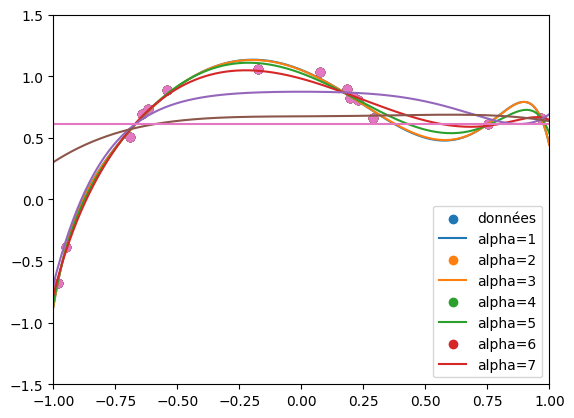

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.244e-03, tolerance: 3.357e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.306e-03, tolerance: 3.357e-04
  model = cd_fast.enet_coordinate_descent(


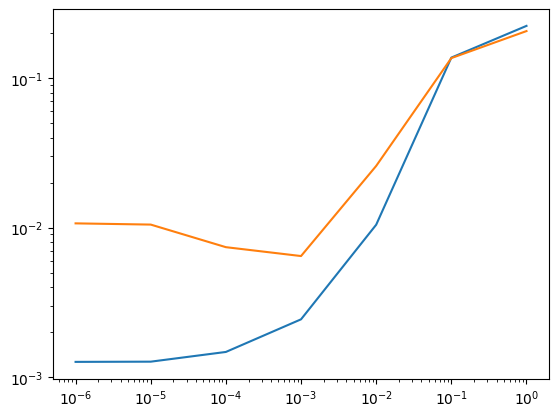

In [ ]:
from sklearn.linear_model import Lasso
f=Lasso(0.1)
def regr_poly_lasso (d,alpha=1):
  psi= PolynomialFeatures(d,include_bias=False).fit_transform
  return Lasso(alpha).fit(psi(X),y), psi

for alpha in [10**a for a in range (-6,1)]:
  f,psi=regr_poly_lasso(14,alpha)
  plt.scatter(X,y)
  plt.plot(xplot,f.predict(psi(xplot)))
  plt.axis([-1,1,-1.5,1.5])
  print("Coefficients du polynôme:", f.coef_)
plt.legend(["données",'alpha=1','alpha=2', 'alpha=3','alpha=4',"alpha=5","alpha=6","alpha=7"])
plt.show()

mean_train_error=[]
mean_test_error=[]
alpha_range=[10**a for a in range(-6,1)]
for alpha in alpha_range:
  f,psi=regr_poly_lasso(14,alpha)
  mean_train_error.append(sum((y-f.predict(psi(X)))**2)/15)
  mean_test_error.append(sum((y_test-f.predict(psi(X_test)))**2)/30)
plt.plot((alpha_range),mean_train_error)
plt.plot((alpha_range),mean_test_error)
plt.xscale('log')
plt.yscale('log')
plt.show()

